## Análisis Estadísitco 
### Análisis espacio-temporal de la distribución de la cobertura de suelo y dinámicas de vegetación 

Equipo:
* Martha Juarez
* Adilene
* Paola 
* Benjamin 
* Carlos Velazquez
* Ibsan Morales
* Manuel
* Samuel Cortez

In [48]:
# Librerías para el tratamiento y operación de los datos
import numpy as np
import pandas as pd
import math
# Librerías de visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
# Librería para el análisis de los datos nulos
import missingno as msno
# Librería con funciones del sistema operativo
import os

In [51]:
plt.style.use('ggplot')

In [5]:
# Se obtienen todos los csvs
main_path = 'NDVI/NDVI-DENTRO'
files = os.listdir(main_path)

In [10]:
files

['ENCINAR.csv',
 'MATSUB.csv',
 'MATXERO.csv',
 'MEZQUITAL.csv',
 'PASTINDU.csv',
 'PASTIZAL.csv',
 'SIN ATÍPICOS',
 'VEGARRO.csv']

In [8]:
file_path = os.path.join(main_path, files[0])
data_0 = pd.read_csv(file_path, encoding= 'utf-8')
data_0.head()

,X,Y,18-feb.,5-mar.,21-mar.,6-abr.,22-abr.,8-may.,24-may.,9-jun.,...,12-ago..5,28-ago..5,13-sep..5,29-sep..5,15-oct..5,31-oct..5,16-nov..5,2-dic..5,18-dic..5,01-ene.
0,675860.252,3265951.876,3305,3158,3038,2545,2492,2307,2510,2482,...,5976,6598,6421,5292,4796,4842,4286,4662,4693,4746
1,676300.819,3265951.876,3186,3275,2986,2616,2520,2405,2613,2742,...,6190,6851,6477,5054,4569,4399,4085,4353,4144,4254
2,676521.102,3262427.342,2942,2798,2856,2580,2327,2174,2071,2245,...,5886,6262,5745,4854,4512,4432,4154,4337,4285,4329
3,675419.685,3260444.792,2703,2627,2617,2412,2242,2198,2095,2708,...,5358,6010,5393,4744,4504,4384,4155,4377,4245,4273
4,675639.968,3260444.792,2798,2733,2642,2461,2281,2251,2125,2402,...,5358,6010,5393,4744,4504,4384,4155,4377,4245,4273


In [68]:
# Se ejecutan en un ciclo for la importación de los datos
data_df = pd.DataFrame()
file_list = []
shape_list = []

for file in files:
    if file.find('csv') != -1:
        file_list.append(file)
        file_data = os.path.join(main_path, file)
        df_new = pd.read_csv(file_data,
                            sep = ',',
                            index_col= None,
                            encoding= 'utf-8')
        
        df_new['CAT'] = len(df_new)*[file.strip('.csv')]
    
        data_df = pd.concat([data_df, df_new], axis = 0)

In [69]:
data_df.head()

,X,Y,18-feb.,5-mar.,21-mar.,6-abr.,22-abr.,8-may.,24-may.,9-jun.,...,28-ago..5,13-sep..5,29-sep..5,15-oct..5,31-oct..5,16-nov..5,2-dic..5,18-dic..5,01-ene.,CAT
0,675860.252,3265951.876,3305.0,3158.0,3038.0,2545.0,2492.0,2307.0,2510.0,2482.0,...,6598.0,6421.0,5292.0,4796.0,4842.0,4286.0,4662.0,4693.0,4746.0,ENCINAR
1,676300.819,3265951.876,3186.0,3275.0,2986.0,2616.0,2520.0,2405.0,2613.0,2742.0,...,6851.0,6477.0,5054.0,4569.0,4399.0,4085.0,4353.0,4144.0,4254.0,ENCINAR
2,676521.102,3262427.342,2942.0,2798.0,2856.0,2580.0,2327.0,2174.0,2071.0,2245.0,...,6262.0,5745.0,4854.0,4512.0,4432.0,4154.0,4337.0,4285.0,4329.0,ENCINAR
3,675419.685,3260444.792,2703.0,2627.0,2617.0,2412.0,2242.0,2198.0,2095.0,2708.0,...,6010.0,5393.0,4744.0,4504.0,4384.0,4155.0,4377.0,4245.0,4273.0,ENCINAR
4,675639.968,3260444.792,2798.0,2733.0,2642.0,2461.0,2281.0,2251.0,2125.0,2402.0,...,6010.0,5393.0,4744.0,4504.0,4384.0,4155.0,4377.0,4245.0,4273.0,ENCINAR


In [70]:
data_df.tail()

,X,Y,18-feb.,5-mar.,21-mar.,6-abr.,22-abr.,8-may.,24-may.,9-jun.,...,28-ago..5,13-sep..5,29-sep..5,15-oct..5,31-oct..5,16-nov..5,2-dic..5,18-dic..5,01-ene.,CAT
19,681374.744,3248987.953,3352.0,3747.0,2477.0,2688.0,2253.0,2388.0,2357.0,2163.0,...,5626.0,5250.0,4589.0,4315.0,4178.0,3771.0,3990.0,3988.0,3859.0,VEGARRO
20,681154.460,3248767.669,3502.0,3728.0,3241.0,2863.0,2664.0,2594.0,2808.0,2534.0,...,6366.0,6212.0,5227.0,4986.0,4812.0,4635.0,4780.0,4577.0,4646.0,VEGARRO
21,680493.610,3248547.386,3927.0,4767.0,4068.0,3271.0,2723.0,2586.0,2823.0,2495.0,...,6396.0,6098.0,5387.0,5655.0,5382.0,4647.0,5067.0,5301.0,5443.0,VEGARRO
22,681815.310,3248327.103,3518.0,3456.0,3164.0,2938.0,2588.0,2410.0,2754.0,2348.0,...,6511.0,6096.0,4777.0,4542.0,4267.0,4100.0,4176.0,4173.0,4321.0,VEGARRO
23,681815.310,3247666.252,3229.0,3530.0,3238.0,2814.0,2553.0,2462.0,2737.0,2466.0,...,5778.0,5459.0,4777.0,4664.0,4442.0,4068.0,4398.0,4377.0,4241.0,VEGARRO


## Información del DataFrame

In [220]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 23
Columns: 484 entries, X to CAT
dtypes: float64(483), object(1)
memory usage: 831.0+ KB


## Nombre de las columnas

In [26]:
data_df.columns.values.tolist()

['X',
 'Y',
 '18-feb.',
 '5-mar.',
 '21-mar.',
 '6-abr.',
 '22-abr.',
 '8-may.',
 '24-may.',
 '9-jun.',
 '25-jun.',
 '11-jul.',
 '27-jul.',
 '12-ago.',
 '28-ago.',
 '13-sep.',
 '29-sep.',
 '15-oct.',
 '31-oct.',
 '16-nov.',
 '2-dic.',
 '18-dic.',
 '1-ene.',
 '16-ene.',
 '2-feb.',
 '18-feb..1',
 '6-mar.',
 '22-mar.',
 '7-abr.',
 '23-abr.',
 '9-may.',
 '25-may.',
 '10-jun.',
 '26-jun.',
 '12-jul.',
 '28-jul.',
 '13-ago.',
 '29-ago.',
 '14-sep.',
 '30-sep.',
 '16-oct.',
 '1-nov.',
 '17-nov.',
 '3-dic.',
 '19-dic.',
 '1-ene..1',
 '16-ene..1',
 '2-feb..1',
 '18-feb..2',
 '6-mar..1',
 '22-mar..1',
 '7-abr..1',
 '23-abr..1',
 '9-may..1',
 '25-may..1',
 '10-jun..1',
 '26-jun..1',
 '12-jul..1',
 '28-jul..1',
 '13-ago..1',
 '29-ago..1',
 '14-sep..1',
 '30-sep..1',
 '16-oct..1',
 '1-nov..1',
 '17-nov..1',
 '3-dic..1',
 '19-dic..1',
 '1-ene..2',
 '16-ene..2',
 '2-feb..2',
 '18-feb..3',
 '6-mar..2',
 '22-mar..2',
 '7-abr..2',
 '23-abr..2',
 '9-may..2',
 '25-may..2',
 '10-jun..2',
 '26-jun..2',
 '12

In [490]:
(data_df.columns.value_counts(ascending= True) == 1).all()

True

In [475]:
CAT = data_df['CAT'].unique().tolist()
CAT

['ENCINAR',
 'MATSUB',
 'MATXERO',
 'MEZQUITAL',
 'PASTINDU',
 'PASTIZAL',
 'VEGARRO']

## Revisión datos nulos (NaN)

In [80]:
data_null = data_df.isnull().sum(axis = 0).sort_values(ascending = True)

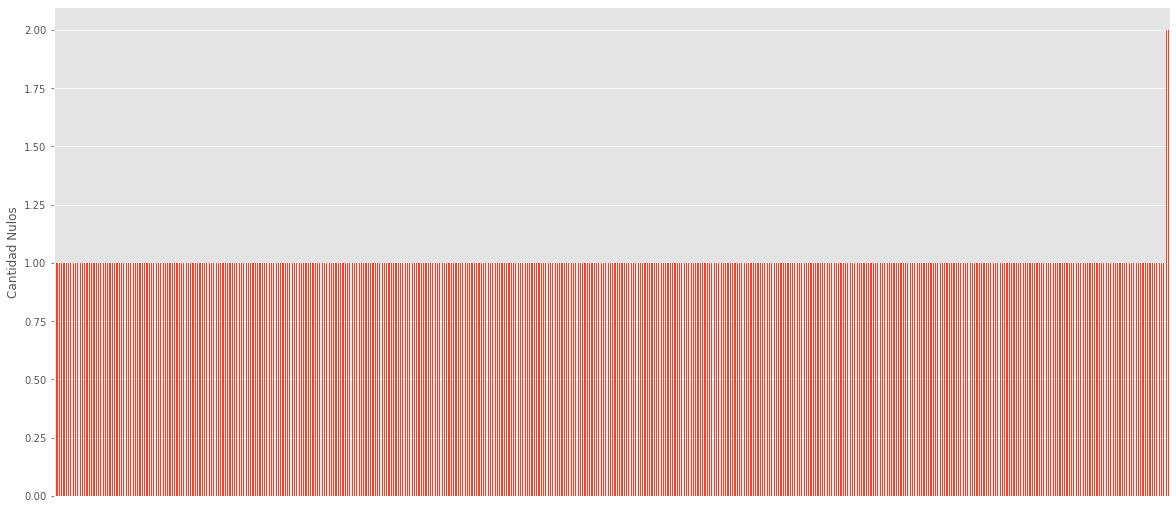

In [226]:
fig_null, ax_null = plt.subplots(nrows=1, ncols = 1, figsize = (20,9))
data_null.plot(kind = 'bar', 
               ax = ax_null)
ax_null.xaxis.set_visible(False)
#ax_null.set_xlabel('Columnas')
ax_null.set_ylabel('Cantidad Nulos')
plt.show()

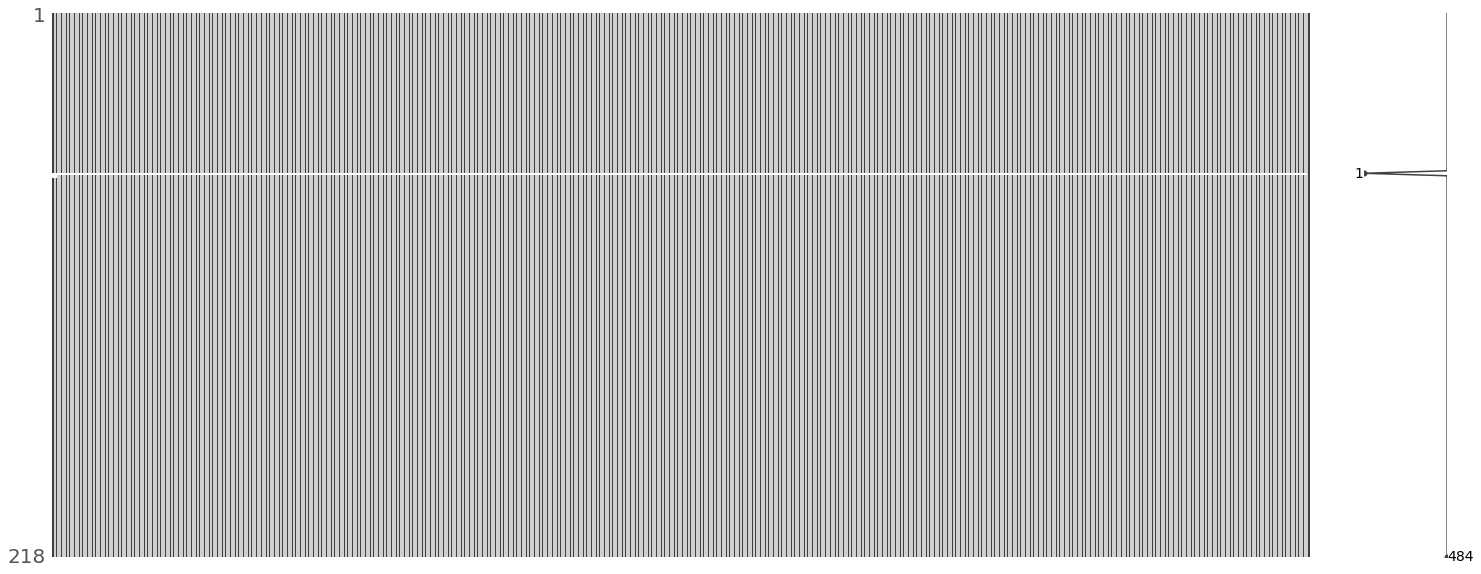

In [87]:
ax_msno = msno.matrix(data_df)
plt.show()

In [227]:
# Se eliminan datos nulos 
data_df.dropna(how = 'any', inplace = True)

In [354]:
data_df_2 = data_df.copy()
data_df_2.loc[:,'XY'] = data_df_2[['X','Y']].apply(lambda s: tuple(s), axis = 1)

In [355]:
data_df_2.drop(columns=['X','Y'], inplace = True)

In [356]:
data_df_2.head()

,18-feb.,5-mar.,21-mar.,6-abr.,22-abr.,8-may.,24-may.,9-jun.,25-jun.,11-jul.,...,13-sep..5,29-sep..5,15-oct..5,31-oct..5,16-nov..5,2-dic..5,18-dic..5,01-ene.,CAT,XY
0,3305.0,3158.0,3038.0,2545.0,2492.0,2307.0,2510.0,2482.0,3631.0,4870.0,...,6421.0,5292.0,4796.0,4842.0,4286.0,4662.0,4693.0,4746.0,ENCINAR,"(675860.252, 3265951.876)"
1,3186.0,3275.0,2986.0,2616.0,2520.0,2405.0,2613.0,2742.0,4639.0,5309.0,...,6477.0,5054.0,4569.0,4399.0,4085.0,4353.0,4144.0,4254.0,ENCINAR,"(676300.819, 3265951.876)"
2,2942.0,2798.0,2856.0,2580.0,2327.0,2174.0,2071.0,2245.0,4304.0,5301.0,...,5745.0,4854.0,4512.0,4432.0,4154.0,4337.0,4285.0,4329.0,ENCINAR,"(676521.1020000001, 3262427.3419999997)"
3,2703.0,2627.0,2617.0,2412.0,2242.0,2198.0,2095.0,2708.0,4104.0,4618.0,...,5393.0,4744.0,4504.0,4384.0,4155.0,4377.0,4245.0,4273.0,ENCINAR,"(675419.685, 3260444.792)"
4,2798.0,2733.0,2642.0,2461.0,2281.0,2251.0,2125.0,2402.0,3556.0,4422.0,...,5393.0,4744.0,4504.0,4384.0,4155.0,4377.0,4245.0,4273.0,ENCINAR,"(675639.968, 3260444.792)"


In [357]:
list_fechas = data_df_2.columns[:-2].values.tolist()

In [358]:
#Diccionaro fechas
dict_fechas = {'ene':'01',
               'feb':'02',
               'mar':'03',
               'abr':'04',
               'may':'05',
               'jun':'06',
               'jul':'07',
               'ago':'08',
               'sep':'09',
               'oct':'10',
               'nov':'11',
               'dic':'12'}
# Formato fechas 
fecha_format = []
year = 2000
num_mes_ini = 1
for fecha in list_fechas:
    mes = fecha.split('.')[0].split('-')[1]
    num_mes = float(dict_fechas[mes].split('.')[0])
    if num_mes < num_mes_ini:
        year += 1
    
    fecha_format.append(fecha.replace(mes, dict_fechas[mes]).split('.')[0] + '-' + str(year))
    num_mes_ini = num_mes

date_time = pd.to_datetime(fecha_format, format = '%d-%m-%Y')

In [491]:
date_time

DatetimeIndex(['2000-02-18', '2000-03-05', '2000-03-21', '2000-04-06',
               '2000-04-22', '2000-05-08', '2000-05-24', '2000-06-09',
               '2000-06-25', '2000-07-11',
               ...
               '2020-08-12', '2020-08-28', '2020-09-13', '2020-09-29',
               '2020-10-15', '2020-10-31', '2020-11-16', '2020-12-02',
               '2020-12-18', '2021-01-01'],
              dtype='datetime64[ns]', length=481, freq=None)

In [359]:
len(fecha_format), len(list_fechas)

(481, 481)

In [360]:
rename_col_fecha = dict(zip(list_fechas, fecha_format))

In [361]:
rename_col_fecha['01-ene.'], fecha_format[-1]

('01-01-2021', '01-01-2021')

In [362]:
data_df_2.rename(columns= rename_col_fecha, inplace = True)

In [363]:
data_df_2.head()

,18-02-2000,5-03-2000,21-03-2000,6-04-2000,22-04-2000,8-05-2000,24-05-2000,9-06-2000,25-06-2000,11-07-2000,...,13-09-2020,29-09-2020,15-10-2020,31-10-2020,16-11-2020,2-12-2020,18-12-2020,01-01-2021,CAT,XY
0,3305.0,3158.0,3038.0,2545.0,2492.0,2307.0,2510.0,2482.0,3631.0,4870.0,...,6421.0,5292.0,4796.0,4842.0,4286.0,4662.0,4693.0,4746.0,ENCINAR,"(675860.252, 3265951.876)"
1,3186.0,3275.0,2986.0,2616.0,2520.0,2405.0,2613.0,2742.0,4639.0,5309.0,...,6477.0,5054.0,4569.0,4399.0,4085.0,4353.0,4144.0,4254.0,ENCINAR,"(676300.819, 3265951.876)"
2,2942.0,2798.0,2856.0,2580.0,2327.0,2174.0,2071.0,2245.0,4304.0,5301.0,...,5745.0,4854.0,4512.0,4432.0,4154.0,4337.0,4285.0,4329.0,ENCINAR,"(676521.1020000001, 3262427.3419999997)"
3,2703.0,2627.0,2617.0,2412.0,2242.0,2198.0,2095.0,2708.0,4104.0,4618.0,...,5393.0,4744.0,4504.0,4384.0,4155.0,4377.0,4245.0,4273.0,ENCINAR,"(675419.685, 3260444.792)"
4,2798.0,2733.0,2642.0,2461.0,2281.0,2251.0,2125.0,2402.0,3556.0,4422.0,...,5393.0,4744.0,4504.0,4384.0,4155.0,4377.0,4245.0,4273.0,ENCINAR,"(675639.968, 3260444.792)"


In [375]:
data_df_3 = data_df_2.copy()
data_df_4 = data_df_3.set_index('XY')
data_df_4.head()

,18-02-2000,5-03-2000,21-03-2000,6-04-2000,22-04-2000,8-05-2000,24-05-2000,9-06-2000,25-06-2000,11-07-2000,...,28-08-2020,13-09-2020,29-09-2020,15-10-2020,31-10-2020,16-11-2020,2-12-2020,18-12-2020,01-01-2021,CAT
XY,,,,,,,,,,,,,,,,,,,,,
"(675860.252, 3265951.876)",3305.0,3158.0,3038.0,2545.0,2492.0,2307.0,2510.0,2482.0,3631.0,4870.0,...,6598.0,6421.0,5292.0,4796.0,4842.0,4286.0,4662.0,4693.0,4746.0,ENCINAR
"(676300.819, 3265951.876)",3186.0,3275.0,2986.0,2616.0,2520.0,2405.0,2613.0,2742.0,4639.0,5309.0,...,6851.0,6477.0,5054.0,4569.0,4399.0,4085.0,4353.0,4144.0,4254.0,ENCINAR
"(676521.1020000001, 3262427.3419999997)",2942.0,2798.0,2856.0,2580.0,2327.0,2174.0,2071.0,2245.0,4304.0,5301.0,...,6262.0,5745.0,4854.0,4512.0,4432.0,4154.0,4337.0,4285.0,4329.0,ENCINAR
"(675419.685, 3260444.792)",2703.0,2627.0,2617.0,2412.0,2242.0,2198.0,2095.0,2708.0,4104.0,4618.0,...,6010.0,5393.0,4744.0,4504.0,4384.0,4155.0,4377.0,4245.0,4273.0,ENCINAR
"(675639.968, 3260444.792)",2798.0,2733.0,2642.0,2461.0,2281.0,2251.0,2125.0,2402.0,3556.0,4422.0,...,6010.0,5393.0,4744.0,4504.0,4384.0,4155.0,4377.0,4245.0,4273.0,ENCINAR


In [376]:
list_posxy = data_df_4.index.values.tolist()

In [377]:
rename_index = {index : 'posXY_'+str(i) for i, index in enumerate(list_posxy)}

In [379]:
data_df_4.rename(index = rename_index, inplace = True)
data_df_4.head()

,18-02-2000,5-03-2000,21-03-2000,6-04-2000,22-04-2000,8-05-2000,24-05-2000,9-06-2000,25-06-2000,11-07-2000,...,28-08-2020,13-09-2020,29-09-2020,15-10-2020,31-10-2020,16-11-2020,2-12-2020,18-12-2020,01-01-2021,CAT
XY,,,,,,,,,,,,,,,,,,,,,
posXY_0,3305.0,3158.0,3038.0,2545.0,2492.0,2307.0,2510.0,2482.0,3631.0,4870.0,...,6598.0,6421.0,5292.0,4796.0,4842.0,4286.0,4662.0,4693.0,4746.0,ENCINAR
posXY_1,3186.0,3275.0,2986.0,2616.0,2520.0,2405.0,2613.0,2742.0,4639.0,5309.0,...,6851.0,6477.0,5054.0,4569.0,4399.0,4085.0,4353.0,4144.0,4254.0,ENCINAR
posXY_2,2942.0,2798.0,2856.0,2580.0,2327.0,2174.0,2071.0,2245.0,4304.0,5301.0,...,6262.0,5745.0,4854.0,4512.0,4432.0,4154.0,4337.0,4285.0,4329.0,ENCINAR
posXY_3,2703.0,2627.0,2617.0,2412.0,2242.0,2198.0,2095.0,2708.0,4104.0,4618.0,...,6010.0,5393.0,4744.0,4504.0,4384.0,4155.0,4377.0,4245.0,4273.0,ENCINAR
posXY_4,2798.0,2733.0,2642.0,2461.0,2281.0,2251.0,2125.0,2402.0,3556.0,4422.0,...,6010.0,5393.0,4744.0,4504.0,4384.0,4155.0,4377.0,4245.0,4273.0,ENCINAR


In [403]:
data_df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, posXY_0 to posXY_215
Columns: 482 entries, 18-02-2000 to CAT
dtypes: float64(481), object(1)
memory usage: 815.1+ KB


## Agrupamientos

In [428]:
data_group = data_df_4.groupby('CAT')

In [459]:
data_group.agg([np.median, np.std])

18-02-2000             5-03-2000             21-03-2000              \
              median         std    median         std     median         std   
CAT                                                                             
ENCINAR       3045.0  294.169249    3202.0  365.850048     2930.0  258.733512   
MATSUB        2725.0  210.751431    2877.0  222.915013     2696.0  176.654343   
MATXERO       2220.0  202.830878    2373.5  233.957163     2164.0  231.210475   
MEZQUITAL     2385.5  284.449410    2249.5  306.671812     2304.5  213.086289   
PASTINDU      2287.0  177.847060    2563.0  199.626677     2418.0  198.150515   
PASTIZAL      2473.0  212.725669    2595.0  255.656562     2375.0  209.464875   
VEGARRO       2752.0  424.901555    3217.0  506.663037     2793.5  415.520418   

          6-04-2000             22-04-2000              ... 31-10-2020  \
             median         std     median         std  ...     median   
CAT                                                     ...              
ENCINAR      2559.0  177.938181     2329.0  133.856019  ...     4835.0   
MATSUB       2452.0  170.401562     2302.0  147.535919  ...     4117.0   
MATXERO      1989.0  213.464825     1912.5  189.722931  ...     3758.0   
MEZQUITAL    2201.0  162.099249     2075.5  179.825100  ...     4244.5   
PASTINDU     2279.0  185.272997     2127.0  160.514153  ...     3556.0   
PASTIZAL     2191.0  173.101239     2057.0  119.181417  ...     4020.0   
VEGARRO      2646.0  306.090022     2450.0  220.056016  ...     4502.5   

                      16-11-2020             2-12-2020             18-12-2020  \
                  std     median         std    median         std     median   
CAT                                                                             
ENCINAR    352.948948     4548.0  394.475186    4776.0  372.045615     4851.0   
MATSUB     312.445749     3843.0  303.364106    3927.0  330.676254     3933.0   
MATXERO    362.111860     3509.0  360.202195    3642.5  362.030373     3524.5   
MEZQUITAL  335.588240     3941.0  275.856968    4045.5  287.007085     4117.5   
PASTINDU   376.861106     3467.0  319.365778    3413.0  433.607049     3502.0   
PASTIZAL   325.119846     3865.0  333.555853    4023.0  349.948241     4098.0   
VEGARRO    392.102684     4202.0  369.676121    4481.5  434.704797     4508.0   

                      01-01-2021              
                  std     median         std  
CAT                                           
ENCINAR    401.782534     4813.0  373.763297  
MATSUB     273.201686     3981.0  329.451653  
MATXERO    350.165341     3459.0  368.563722  
MEZQUITAL  282.385316     4078.5  264.316792  
PASTINDU   369.587144     3427.0  319.729224  
PASTIZAL   299.298405     4068.0  314.923959  
VEGARRO    411.803870     4489.0  469.747226  

[7 rows x 962 columns]

In [453]:
describe_data_group = data_group.agg([np.median, np.std]).T
describe_data_group.head()

CAT                    ENCINAR       MATSUB      MATXERO    MEZQUITAL  \
18-02-2000 median  3045.000000  2725.000000  2220.000000  2385.500000   
           std      294.169249   210.751431   202.830878   284.449410   
5-03-2000  median  3202.000000  2877.000000  2373.500000  2249.500000   
           std      365.850048   222.915013   233.957163   306.671812   
21-03-2000 median  2930.000000  2696.000000  2164.000000  2304.500000   

CAT                   PASTINDU     PASTIZAL      VEGARRO  
18-02-2000 median  2287.000000  2473.000000  2752.000000  
           std      177.847060   212.725669   424.901555  
5-03-2000  median  2563.000000  2595.000000  3217.000000  
           std      199.626677   255.656562   506.663037  
21-03-2000 median  2418.000000  2375.000000  2793.500000

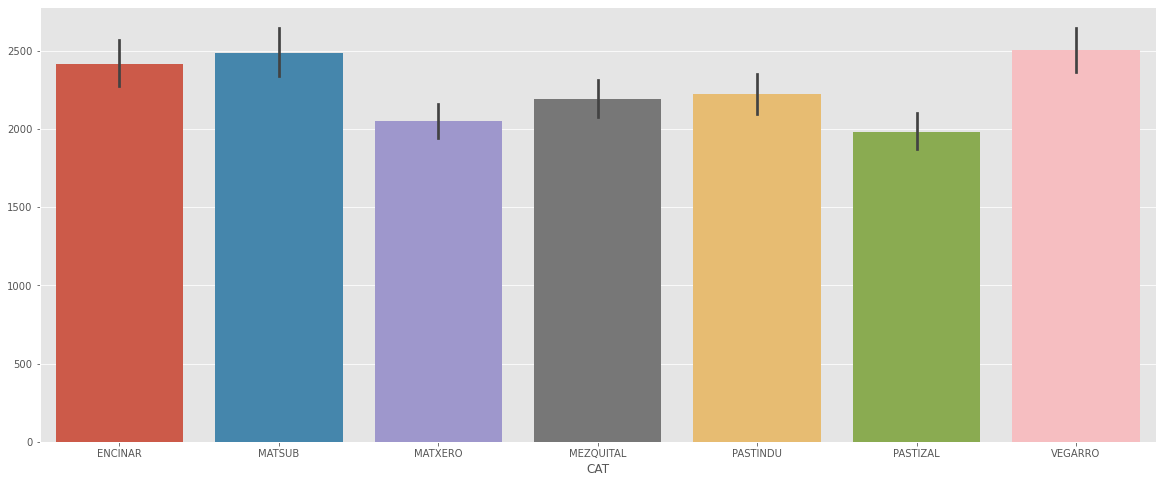

In [458]:
fig_group, ax_group = plt.subplots(nrows = 1, ncols = 1, figsize = (20,8))
sns.barplot(data = describe_data_group, ax = ax_group)
plt.show()

In [405]:
ENCINAR_df = data_group.get_group('ENCINAR')
ENCINAR_df.head()

,18-02-2000,5-03-2000,21-03-2000,6-04-2000,22-04-2000,8-05-2000,24-05-2000,9-06-2000,25-06-2000,11-07-2000,...,28-08-2020,13-09-2020,29-09-2020,15-10-2020,31-10-2020,16-11-2020,2-12-2020,18-12-2020,01-01-2021,CAT
XY,,,,,,,,,,,,,,,,,,,,,
posXY_0,3305.0,3158.0,3038.0,2545.0,2492.0,2307.0,2510.0,2482.0,3631.0,4870.0,...,6598.0,6421.0,5292.0,4796.0,4842.0,4286.0,4662.0,4693.0,4746.0,ENCINAR
posXY_1,3186.0,3275.0,2986.0,2616.0,2520.0,2405.0,2613.0,2742.0,4639.0,5309.0,...,6851.0,6477.0,5054.0,4569.0,4399.0,4085.0,4353.0,4144.0,4254.0,ENCINAR
posXY_2,2942.0,2798.0,2856.0,2580.0,2327.0,2174.0,2071.0,2245.0,4304.0,5301.0,...,6262.0,5745.0,4854.0,4512.0,4432.0,4154.0,4337.0,4285.0,4329.0,ENCINAR
posXY_3,2703.0,2627.0,2617.0,2412.0,2242.0,2198.0,2095.0,2708.0,4104.0,4618.0,...,6010.0,5393.0,4744.0,4504.0,4384.0,4155.0,4377.0,4245.0,4273.0,ENCINAR
posXY_4,2798.0,2733.0,2642.0,2461.0,2281.0,2251.0,2125.0,2402.0,3556.0,4422.0,...,6010.0,5393.0,4744.0,4504.0,4384.0,4155.0,4377.0,4245.0,4273.0,ENCINAR


In [407]:
ENCINAR_df_2 = ENCINAR_df.copy()

In [412]:
ENCINAR_df_3 = ENCINAR_df_2.iloc[:,:-1].transpose()
ENCINAR_df_3.head()

XY,posXY_0,posXY_1,posXY_2,posXY_3,posXY_4,posXY_5,posXY_6,posXY_7,posXY_8,posXY_9,...,posXY_23,posXY_24,posXY_25,posXY_26,posXY_27,posXY_28,posXY_29,posXY_30,posXY_31,posXY_32
18-02-2000,3305.0,3186.0,2942.0,2703.0,2798.0,2739.0,2962.0,2641.0,2528.0,3245.0,...,2906.0,2940.0,2913.0,3156.0,3069.0,3035.0,3099.0,3149.0,3346.0,3694.0
5-03-2000,3158.0,3275.0,2798.0,2627.0,2733.0,2645.0,3061.0,2537.0,2922.0,3387.0,...,2939.0,3268.0,3251.0,3613.0,3531.0,3250.0,3353.0,3363.0,3650.0,3961.0
21-03-2000,3038.0,2986.0,2856.0,2617.0,2642.0,2580.0,2710.0,2390.0,2642.0,2937.0,...,2747.0,2909.0,2967.0,3156.0,3050.0,2956.0,3033.0,3019.0,3374.0,3278.0
6-04-2000,2545.0,2616.0,2580.0,2412.0,2461.0,2309.0,2409.0,2138.0,2444.0,2436.0,...,2473.0,2594.0,2632.0,2726.0,2668.0,2716.0,2741.0,2781.0,2967.0,2859.0
22-04-2000,2492.0,2520.0,2327.0,2242.0,2281.0,2106.0,2241.0,2173.0,2286.0,2245.0,...,2203.0,2349.0,2378.0,2448.0,2460.0,2388.0,2407.0,2353.0,2480.0,2594.0


In [413]:
ENCINAR_df_3.rename_axis('Fecha', axis = 'index', inplace = True)
ENCINAR_df_3.head()

XY,posXY_0,posXY_1,posXY_2,posXY_3,posXY_4,posXY_5,posXY_6,posXY_7,posXY_8,posXY_9,...,posXY_23,posXY_24,posXY_25,posXY_26,posXY_27,posXY_28,posXY_29,posXY_30,posXY_31,posXY_32
Fecha,,,,,,,,,,,,,,,,,,,,,
18-02-2000,3305.0,3186.0,2942.0,2703.0,2798.0,2739.0,2962.0,2641.0,2528.0,3245.0,...,2906.0,2940.0,2913.0,3156.0,3069.0,3035.0,3099.0,3149.0,3346.0,3694.0
5-03-2000,3158.0,3275.0,2798.0,2627.0,2733.0,2645.0,3061.0,2537.0,2922.0,3387.0,...,2939.0,3268.0,3251.0,3613.0,3531.0,3250.0,3353.0,3363.0,3650.0,3961.0
21-03-2000,3038.0,2986.0,2856.0,2617.0,2642.0,2580.0,2710.0,2390.0,2642.0,2937.0,...,2747.0,2909.0,2967.0,3156.0,3050.0,2956.0,3033.0,3019.0,3374.0,3278.0
6-04-2000,2545.0,2616.0,2580.0,2412.0,2461.0,2309.0,2409.0,2138.0,2444.0,2436.0,...,2473.0,2594.0,2632.0,2726.0,2668.0,2716.0,2741.0,2781.0,2967.0,2859.0
22-04-2000,2492.0,2520.0,2327.0,2242.0,2281.0,2106.0,2241.0,2173.0,2286.0,2245.0,...,2203.0,2349.0,2378.0,2448.0,2460.0,2388.0,2407.0,2353.0,2480.0,2594.0


In [415]:
ENCINAR_df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 18-02-2000 to 01-01-2021
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   posXY_0   481 non-null    float64
 1   posXY_1   481 non-null    float64
 2   posXY_2   481 non-null    float64
 3   posXY_3   481 non-null    float64
 4   posXY_4   481 non-null    float64
 5   posXY_5   481 non-null    float64
 6   posXY_6   481 non-null    float64
 7   posXY_7   481 non-null    float64
 8   posXY_8   481 non-null    float64
 9   posXY_9   481 non-null    float64
 10  posXY_10  481 non-null    float64
 11  posXY_11  481 non-null    float64
 12  posXY_12  481 non-null    float64
 13  posXY_13  481 non-null    float64
 14  posXY_14  481 non-null    float64
 15  posXY_15  481 non-null    float64
 16  posXY_16  481 non-null    float64
 17  posXY_17  481 non-null    float64
 18  posXY_18  481 non-null    float64
 19  posXY_19  481 non-null    float64
 20  posXY_20  481 non-nul

In [416]:
(ENCINAR_df_3.isnull().sum(axis = 0) == 0).all()

True

In [419]:
round(ENCINAR_df_3.describe(),2)

XY,posXY_0,posXY_1,posXY_2,posXY_3,posXY_4,posXY_5,posXY_6,posXY_7,posXY_8,posXY_9,...,posXY_23,posXY_24,posXY_25,posXY_26,posXY_27,posXY_28,posXY_29,posXY_30,posXY_31,posXY_32
count,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,...,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00
mean,4350.10,4664.57,4177.60,4204.78,4158.92,4065.56,4512.43,4282.02,4632.76,4399.29,...,4199.84,4609.76,4490.73,4602.36,4673.76,4398.42,4305.06,4341.10,4871.16,5017.09
std,1234.08,1425.21,1298.39,1208.22,1131.70,1215.21,1338.37,1277.91,1472.98,1218.38,...,1193.42,1416.37,1340.87,1392.23,1411.87,1244.54,1187.00,1223.03,1441.23,1558.26
min,2230.00,2307.00,2071.00,2080.00,2109.00,1949.00,2021.00,2029.00,2237.00,2033.00,...,2109.00,2058.00,2134.00,2020.00,2070.00,2135.00,2156.00,2032.00,2295.00,2184.00
25%,3222.00,3405.00,3102.00,3189.00,3240.00,3022.00,3432.00,3205.00,3405.00,3309.00,...,3228.00,3321.00,3306.00,3346.00,3414.00,3380.00,3353.00,3286.00,3700.00,3683.00
50%,4467.00,4667.00,4090.00,4275.00,4253.00,4020.00,4618.00,4278.00,4612.00,4639.00,...,4295.00,4718.00,4547.00,4745.00,4828.00,4496.00,4405.00,4485.00,5028.00,5219.00
75%,5257.00,5701.00,5031.00,5082.00,5066.00,4979.00,5502.00,5262.00,5705.00,5353.00,...,5049.00,5823.00,5661.00,5781.00,5857.00,5432.00,5219.00,5282.00,5933.00,6382.00
max,7255.00,7796.00,7776.00,6996.00,6651.00,6907.00,7527.00,6916.00,7939.00,6831.00,...,6738.00,7357.00,7249.00,7194.00,7304.00,7138.00,6805.00,6753.00,7812.00,7856.00


In [420]:
ENCINAR_corr = ENCINAR_df_3.corr(method = 'pearson')

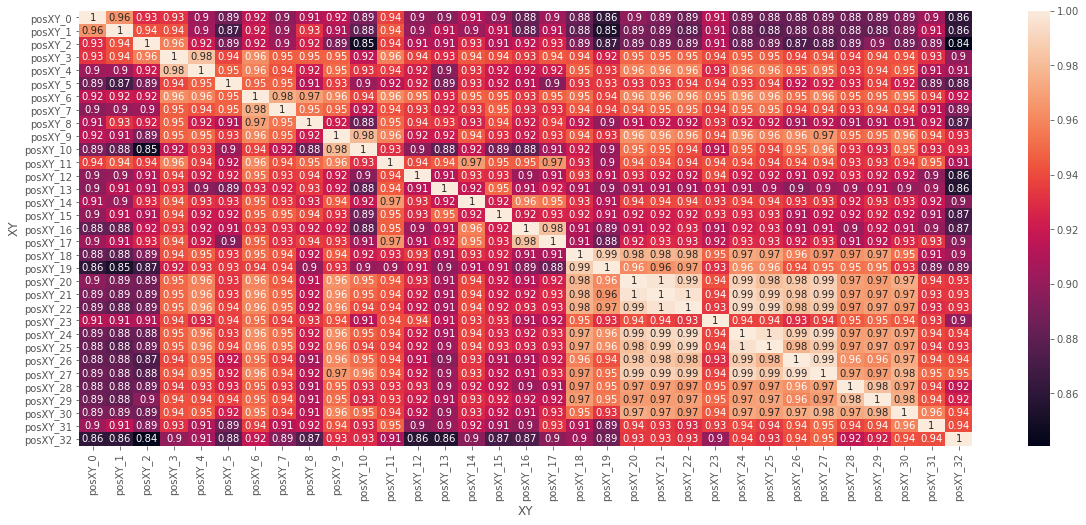

In [421]:
fig_corr, ax_corr = plt.subplots(nrows=1, ncols=1, figsize = (20,8))
sns.heatmap(ENCINAR_corr, annot=True, ax = ax_corr)
plt.show()

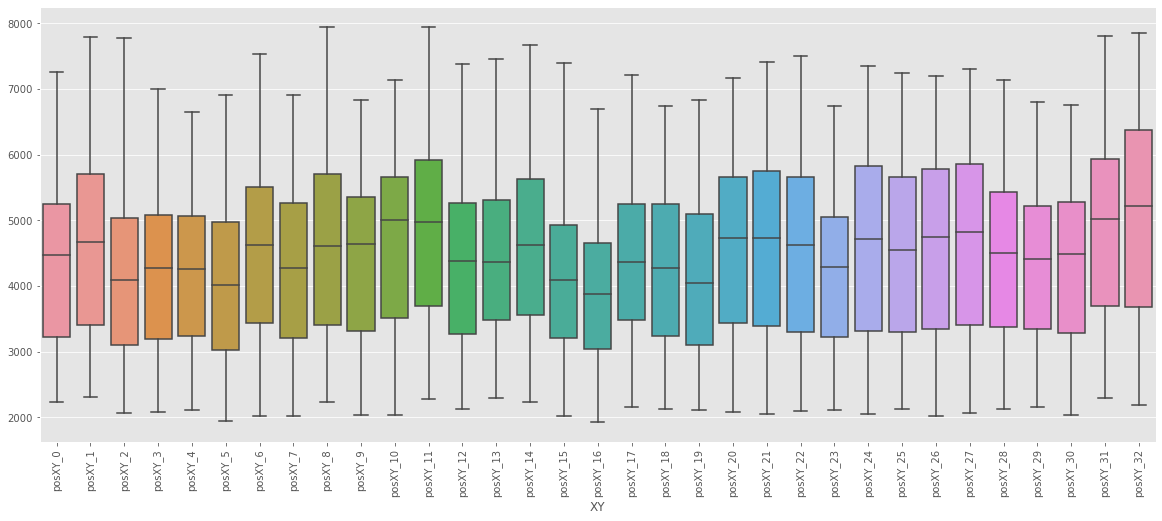

In [464]:
fig_box_E, ax_box_E = plt.subplots(nrows=1, ncols = 1, figsize= (20,8))
sns.boxplot(data = ENCINAR_df_3, ax = ax_box_E)
#plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

In [466]:
ENCINAR_df_3.index = date_time

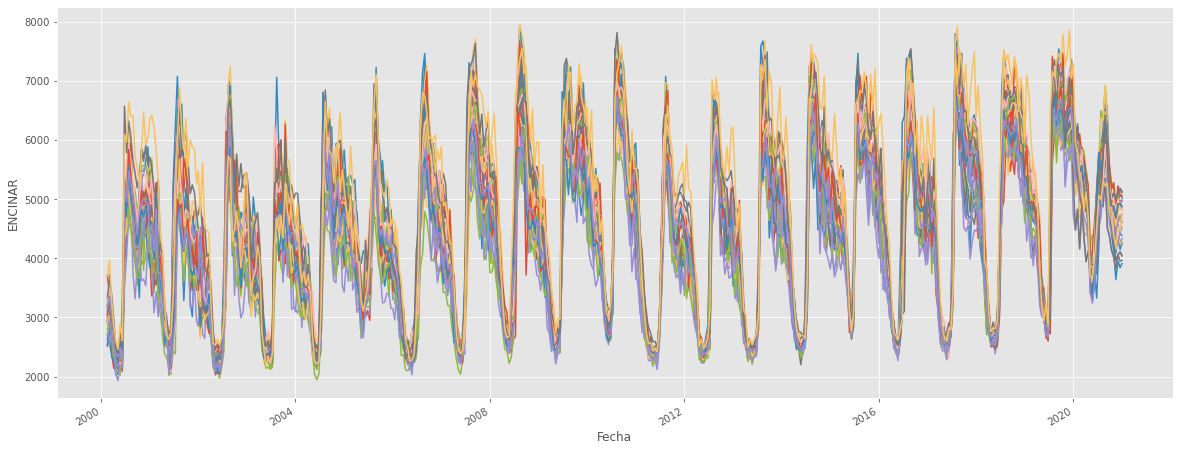

In [469]:
ax_trend = ENCINAR_df_3.plot(kind = 'line', 
                             subplots = False,
                             sharex = True,
                             figsize = (20,8),
                             legend = False)
ax_trend.set_xlabel('Fecha')
ax_trend.set_ylabel('ENCINAR')
plt.show()

## Tendencias por categoría

In [471]:
def ts_group(df_group, cat):
    list_df_group = []
    for element in cat:
        df_ = df_group.get_group(element)
        df_T = df_.iloc[:,:-1].transpose()
        df_T.rename_axis('Fecha', axis = 'index', inplace = True)
        list_df_group.append(df_T)
        
    return list_df_group
    

In [472]:
file_list

['ENCINAR.csv',
 'MATSUB.csv',
 'MATXERO.csv',
 'MEZQUITAL.csv',
 'PASTINDU.csv',
 'PASTIZAL.csv',
 'VEGARRO.csv']

In [476]:
list_groups = ts_group(data_group, CAT)

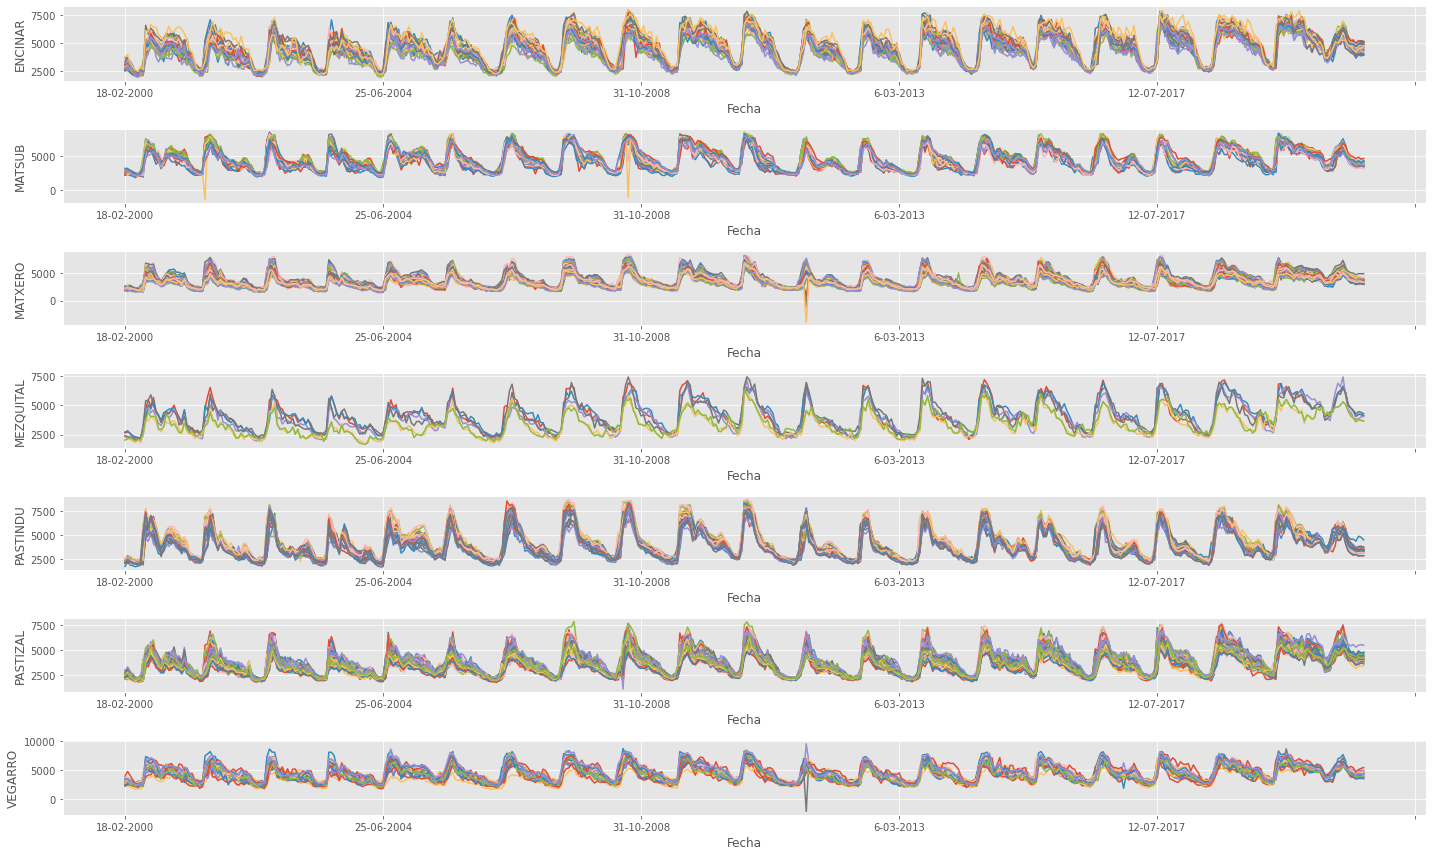

In [481]:
fig_groups, ax_groups = plt.subplots(nrows = len(CAT), ncols = 1, figsize = (20,12))
for k, df_cat in enumerate(list_groups):
    df_cat.plot(kind = 'line', 
                legend = False, 
                ax = ax_groups[k])
    ax_groups[k].set_xlabel('Fecha')
    ax_groups[k].set_ylabel(CAT[k])
plt.tight_layout()
plt.show()

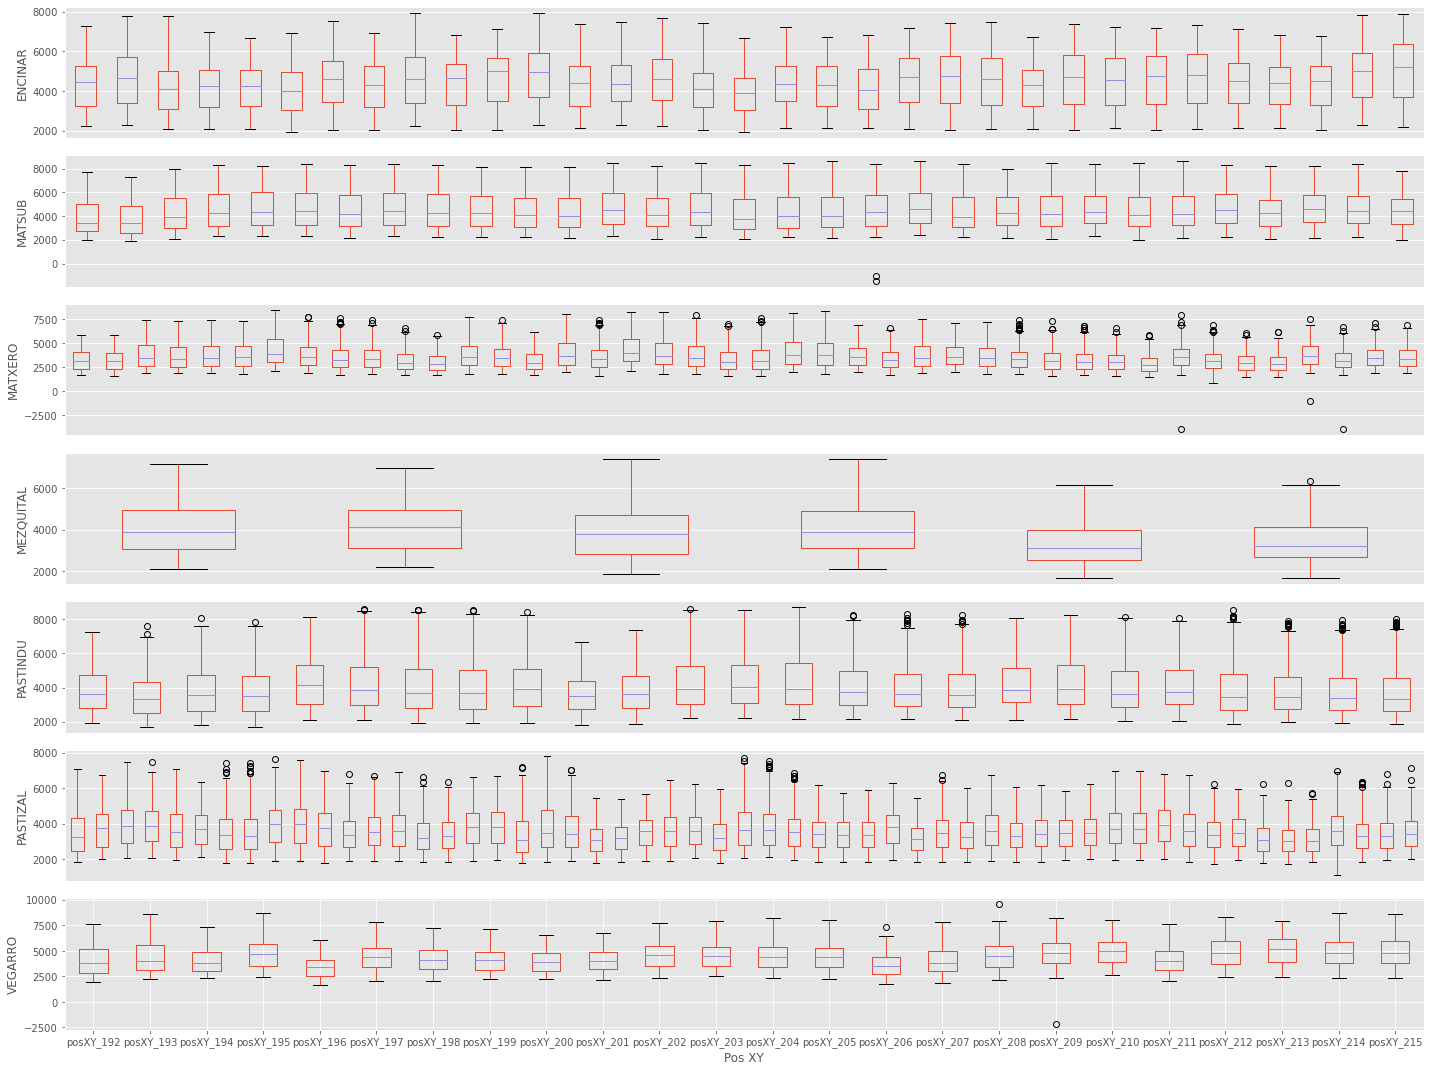

In [489]:
fig_box_groups, ax_box_groups = plt.subplots(nrows = len(CAT), ncols = 1, figsize = (20,15))
for k, df_cat in enumerate(list_groups):
    df_cat.plot(kind = 'box', 
                legend = False, 
                ax = ax_box_groups[k])
    if k == len(CAT)-1:
        ax_box_groups[k].set_xlabel('Pos XY')
    else:
        ax_box_groups[k].xaxis.set_visible(False)
    
    ax_box_groups[k].set_ylabel(CAT[k])

plt.tight_layout()
plt.show()

In [492]:
list_groups[0]

XY,posXY_0,posXY_1,posXY_2,posXY_3,posXY_4,posXY_5,posXY_6,posXY_7,posXY_8,posXY_9,...,posXY_23,posXY_24,posXY_25,posXY_26,posXY_27,posXY_28,posXY_29,posXY_30,posXY_31,posXY_32
Fecha,,,,,,,,,,,,,,,,,,,,,
18-02-2000,3305.0,3186.0,2942.0,2703.0,2798.0,2739.0,2962.0,2641.0,2528.0,3245.0,...,2906.0,2940.0,2913.0,3156.0,3069.0,3035.0,3099.0,3149.0,3346.0,3694.0
5-03-2000,3158.0,3275.0,2798.0,2627.0,2733.0,2645.0,3061.0,2537.0,2922.0,3387.0,...,2939.0,3268.0,3251.0,3613.0,3531.0,3250.0,3353.0,3363.0,3650.0,3961.0
21-03-2000,3038.0,2986.0,2856.0,2617.0,2642.0,2580.0,2710.0,2390.0,2642.0,2937.0,...,2747.0,2909.0,2967.0,3156.0,3050.0,2956.0,3033.0,3019.0,3374.0,3278.0
6-04-2000,2545.0,2616.0,2580.0,2412.0,2461.0,2309.0,2409.0,2138.0,2444.0,2436.0,...,2473.0,2594.0,2632.0,2726.0,2668.0,2716.0,2741.0,2781.0,2967.0,2859.0
22-04-2000,2492.0,2520.0,2327.0,2242.0,2281.0,2106.0,2241.0,2173.0,2286.0,2245.0,...,2203.0,2349.0,2378.0,2448.0,2460.0,2388.0,2407.0,2353.0,2480.0,2594.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31-10-2020,4842.0,4399.0,4432.0,4384.0,4384.0,4923.0,4835.0,4688.0,4626.0,4869.0,...,4814.0,5100.0,4756.0,4988.0,4988.0,4872.0,4872.0,4448.0,4294.0,4382.0
16-11-2020,4286.0,4085.0,4154.0,4155.0,4155.0,4591.0,4618.0,4406.0,4350.0,4663.0,...,4388.0,5010.0,4548.0,4804.0,4804.0,4682.0,4682.0,4207.0,3968.0,4199.0
2-12-2020,4662.0,4353.0,4337.0,4377.0,4377.0,4702.0,4939.0,4953.0,4569.0,5000.0,...,4635.0,5093.0,4761.0,4990.0,4990.0,4918.0,4918.0,4277.0,4060.0,4533.0


In [497]:
def filt_out(list_groups, cat):
    for df in list_groups:
        print(df)
        cols_list = []
        list_columns = df.columns.values.tolist()
        print(list_columns)
        for col in list_columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3-Q1
            lim_max = Q3 + 1.5*IQR
            lim_inf = Q1 - 1.5*IQR
            cols_list.append(df[col][df[col]<lim_max & df[col]>lim_inf])
    return cols_list


ist_df_group = []
    for element in cat:
        df_ = df_group.get_group(element)
        df_T = df_.iloc[:,:-1].transpose()
        df_T.rename_axis('Fecha', axis = 'index', inplace = True)
        list_df_group.append(df_T)

In [498]:
filt_out(data_group, CAT)

('ENCINAR',           18-02-2000  5-03-2000  21-03-2000  6-04-2000  22-04-2000  8-05-2000  \
XY                                                                              
posXY_0       3305.0     3158.0      3038.0     2545.0      2492.0     2307.0   
posXY_1       3186.0     3275.0      2986.0     2616.0      2520.0     2405.0   
posXY_2       2942.0     2798.0      2856.0     2580.0      2327.0     2174.0   
posXY_3       2703.0     2627.0      2617.0     2412.0      2242.0     2198.0   
posXY_4       2798.0     2733.0      2642.0     2461.0      2281.0     2251.0   
posXY_5       2739.0     2645.0      2580.0     2309.0      2106.0     2067.0   
posXY_6       2962.0     3061.0      2710.0     2409.0      2241.0     2229.0   
posXY_7       2641.0     2537.0      2390.0     2138.0      2173.0     2125.0   
posXY_8       2528.0     2922.0      2642.0     2444.0      2286.0     2252.0   
posXY_9       3245.0     3387.0      2937.0     2436.0      2245.0     2150.0   
posXY_10      37

AttributeError: 'tuple' object has no attribute 'columns'